In [225]:
# Load in the python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import pydotplus 

import sklearn.metrics as metrics
pd.options.display.float_format = '{:,.2f}'.format

In [226]:
# Create the data frames
student_info_df = pd.read_csv('data/studentInfo.csv')


In [240]:
student_info_df.dropna(subset=['imd_band'], inplace=True)
student_info_df.reset_index(drop=True, inplace=True)
# drop widthdrawn
student_info_df = student_info_df[student_info_df.final_result != 'Withdrawn']

y = student_info_df[['final_result']]
# convert pass to 1 and fail to 0
y = y.replace(['Pass', 'Fail'], [0, 1])


# replace distinction with 0
y = y.replace(['Distinction'], [0])


# create a new data frame called x which might be used to predict the final result

x = student_info_df.drop(['final_result', 'id_student', 'code_presentation', 'code_module'], axis=1)

# convert the categorical data to numerical data for everything except studied_credits
le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])
x['disability'] = le.fit_transform(x['disability'])
#x['code_presentation'] = le.fit_transform(x['code_presentation'])
#x['code_module'] = le.fit_transform(x['code_module'])
x['imd_band'] = le.fit_transform(x['imd_band'])
x['age_band'] = le.fit_transform(x['age_band'])
x['region'] = le.fit_transform(x['region'])
x['highest_education'] = le.fit_transform(x['highest_education'])


# predicted = cross_val_score(clf, x, y, cv=10)
# print(predicted.mean())

# make a class called evaluate 


def plot_learning_curve(clf, name, x_train, y_train): 
    train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1)
    plt.figure()
    plt.title(name)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_confusion_matrix(clf, y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
    disp.plot()
    plt.show()

def print_metrics(y_test, y_pred, algorithm):
    print(f"{algorithm} Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(f"{algorithm} Recall:", metrics.recall_score(y_test, y_pred))
    print(f"{algorithm} Precision:", metrics.precision_score(y_test, y_pred))
    print(f"{algorithm} F1 score:", metrics.f1_score(y_test, y_pred))


    # plot the learning curve

# plot the learning curve


In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)

# do cross validation and print results
cross_validation_result = cross_val_score(clf, x_train, y_train)
print(cross_validation_result)
print(cross_validation_result.std())
# do the prediction
y_pred = clf.predict(x_test)

[0.69126739 0.68199382 0.67607267 0.68960186 0.6899884 ]
0.005848007554399344


[learning_curve] Training set sizes: [  103   312   521   730   939  1148  1358  1567  1776  1985  2194  2403
  2612  2821  3030  3239  3448  3658  3867  4076  4285  4494  4703  4912
  5121  5330  5539  5748  5958  6167  6376  6585  6794  7003  7212  7421
  7630  7839  8048  8258  8467  8676  8885  9094  9303  9512  9721  9930
 10139 10349]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.2s finished
/Users/gregreynders/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


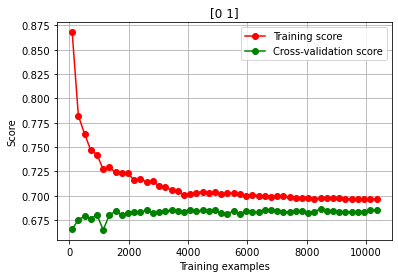

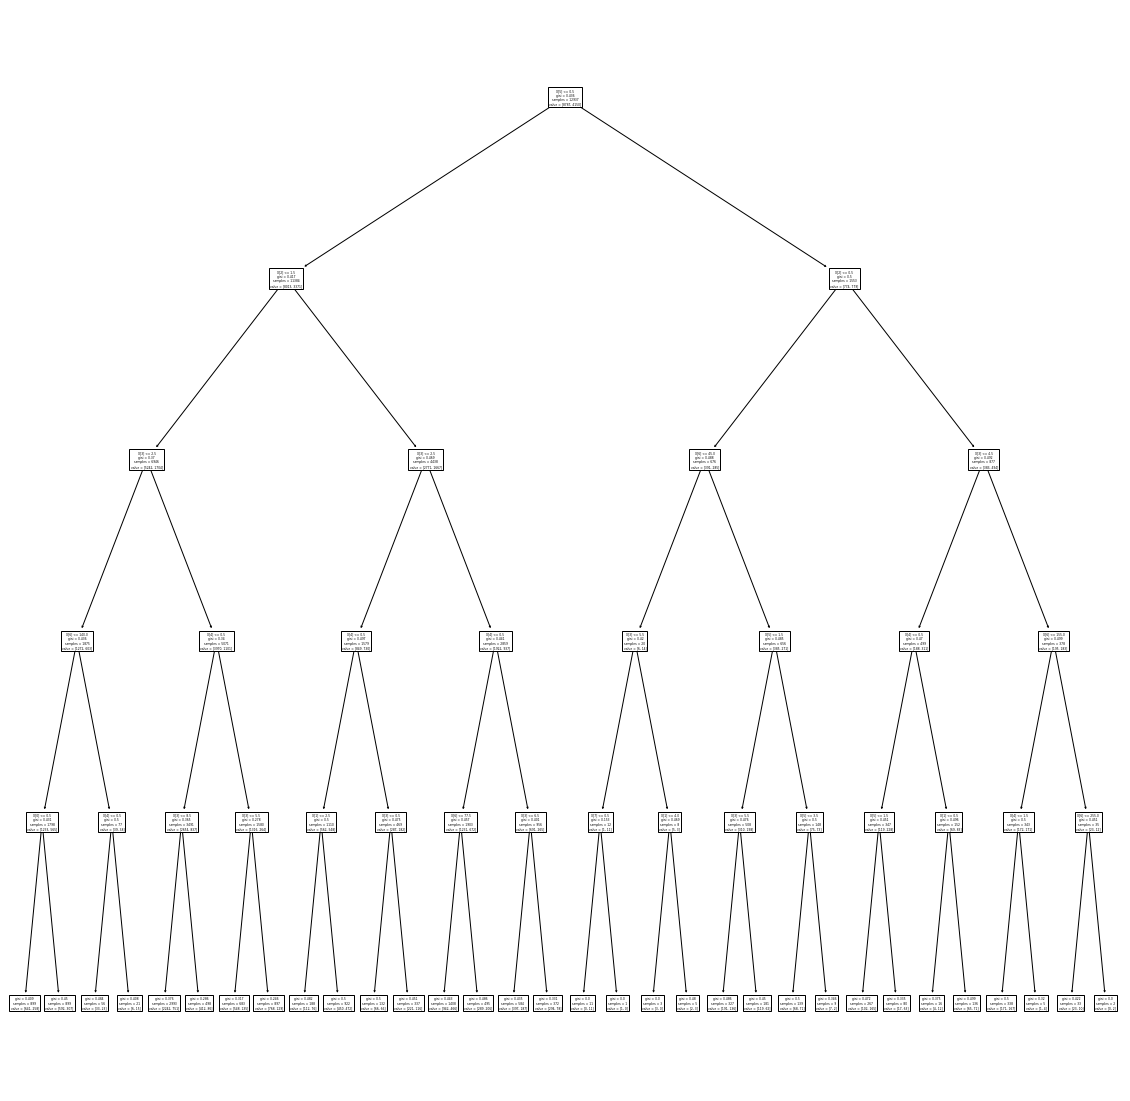

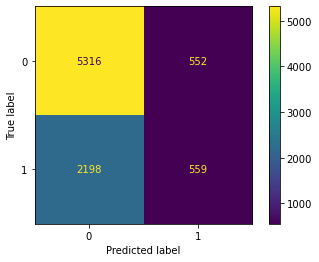

Accuracy [0 1]: 0.6811594202898551
Recall [0 1]: 0.20275661951396445
Precision [0 1]: 0.5031503150315032
F1 score [0 1]: 0.28903826266804555


In [229]:
# plot learning curve
plot_learning_curve(clf, clf.classes_, x_train, y_train)


#plot decision tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(clf, ax=ax)
plt.show()

#plot confusion matrix
plot_confusion_matrix(clf, y_test, y_pred)

# print accuracy, recall, precision and f1 score
print_metrics(y_test, y_pred, clf.classes_)



In [230]:
# use random forest classifier to predict the final result
clf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=0)
y_train = np.ravel(y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

array([0.69319938, 0.68044822, 0.68380363, 0.68921531, 0.68882876])

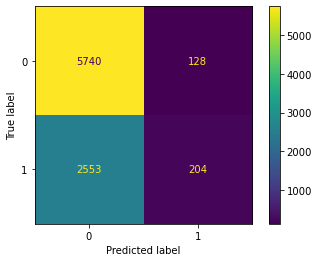

[learning_curve] Training set sizes: [  103   312   521   730   939  1148  1358  1567  1776  1985  2194  2403
  2612  2821  3030  3239  3448  3658  3867  4076  4285  4494  4703  4912
  5121  5330  5539  5748  5958  6167  6376  6585  6794  7003  7212  7421
  7630  7839  8048  8258  8467  8676  8885  9094  9303  9512  9721  9930
 10139 10349]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished
/Users/gregreynders/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


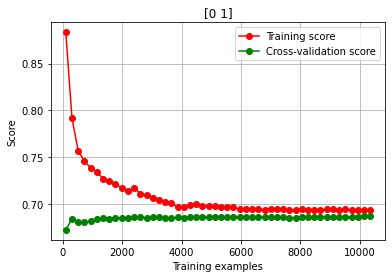

Accuracy [0 1]: 0.6891594202898551
Recall [0 1]: 0.07399347116430903
Precision [0 1]: 0.6144578313253012
F1 score [0 1]: 0.1320815797992878


In [231]:
plot_confusion_matrix(clf, y_test, y_pred)
plot_learning_curve(clf, clf.classes_, x_train, y_train)
print_metrics(y_test, y_pred, clf.classes_)

In [232]:
# use logistic regression to predict the final result
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(x_train, y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

array([0.69513138, 0.68160742, 0.67916506, 0.69346734, 0.68921531])

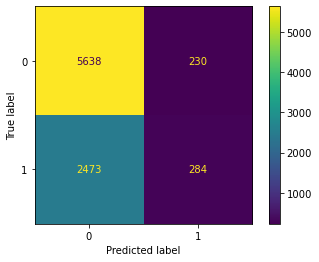

[learning_curve] Training set sizes: [  103   312   521   730   939  1148  1358  1567  1776  1985  2194  2403
  2612  2821  3030  3239  3448  3658  3867  4076  4285  4494  4703  4912
  5121  5330  5539  5748  5958  6167  6376  6585  6794  7003  7212  7421
  7630  7839  8048  8258  8467  8676  8885  9094  9303  9512  9721  9930
 10139 10349]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.0s finished
/Users/gregreynders/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


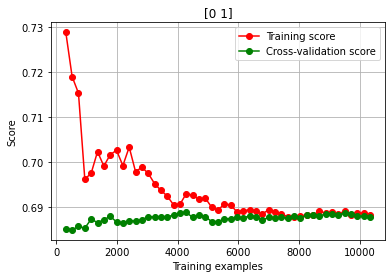

Accuracy [0 1]: 0.6866086956521739
Recall [0 1]: 0.10301051867972434
Precision [0 1]: 0.5525291828793775
F1 score [0 1]: 0.17364720269030878


In [233]:

plot_confusion_matrix(clf, y_test, y_pred)
plot_learning_curve(clf, clf.classes_, x_train, y_train)
print_metrics(y_test, y_pred, clf.classes_)

In [234]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
cross_val_score(clf, x_train, y_train)

array([0.69513138, 0.68160742, 0.67916506, 0.69346734, 0.68921531])

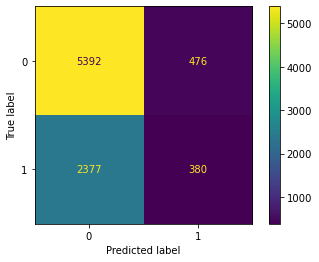

[learning_curve] Training set sizes: [  103   312   521   730   939  1148  1358  1567  1776  1985  2194  2403
  2612  2821  3030  3239  3448  3658  3867  4076  4285  4494  4703  4912
  5121  5330  5539  5748  5958  6167  6376  6585  6794  7003  7212  7421
  7630  7839  8048  8258  8467  8676  8885  9094  9303  9512  9721  9930
 10139 10349]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   41.5s finished
/Users/gregreynders/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


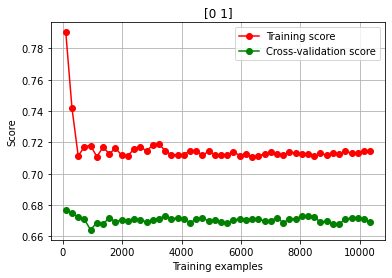

Accuracy [0 1]: 0.6692173913043479
Recall [0 1]: 0.1378309756982227
Precision [0 1]: 0.4439252336448598
F1 score [0 1]: 0.21035150844173817


In [235]:
plot_confusion_matrix(knn_classifier, y_test, y_pred)
plot_learning_curve(clf, clf.classes_, x_train, y_train)
print_metrics(y_test, y_pred, knn_classifier.classes_)

In [236]:
# use naive bayes to predict the final result
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

array([0.67542504, 0.65455951, 0.67375338, 0.68534983, 0.67182064])

[learning_curve] Training set sizes: [  103   312   521   730   939  1148  1358  1567  1776  1985  2194  2403
  2612  2821  3030  3239  3448  3658  3867  4076  4285  4494  4703  4912
  5121  5330  5539  5748  5958  6167  6376  6585  6794  7003  7212  7421
  7630  7839  8048  8258  8467  8676  8885  9094  9303  9512  9721  9930
 10139 10349]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.9s finished
/Users/gregreynders/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


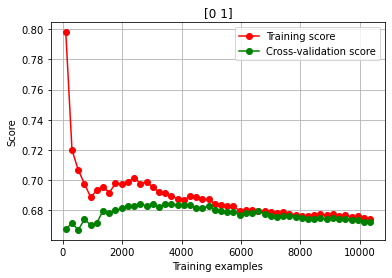

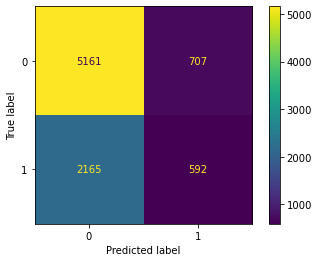

Accuracy [0 1]: 0.6670144927536232
Recall [0 1]: 0.21472615161407327
Precision [0 1]: 0.45573518090839105
F1 score [0 1]: 0.29191321499013806


In [237]:
plot_learning_curve(clf, clf.classes_, x_train, y_train)
plot_confusion_matrix(clf, y_test, y_pred)
print_metrics(y_test, y_pred, clf.classes_)

In [238]:
y_train = np.ravel(y_train)
clf = SVC(kernel='linear')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [241]:
plot_learning_curve(clf, clf.classes_, x_train, y_train)
plot_confusion_matrix(clf, y_test, y_pred)
print_metrics(y_test, y_pred, clf.classes_)

[learning_curve] Training set sizes: [  103   312   521   730   939  1148  1358  1567  1776  1985  2194  2403
  2612  2821  3030  3239  3448  3658  3867  4076  4285  4494  4703  4912
  5121  5330  5539  5748  5958  6167  6376  6585  6794  7003  7212  7421
  7630  7839  8048  8258  8467  8676  8885  9094  9303  9512  9721  9930
 10139 10349]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
y_train = np.ravel(y_train)
clf = SVC(kernel='rbf')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

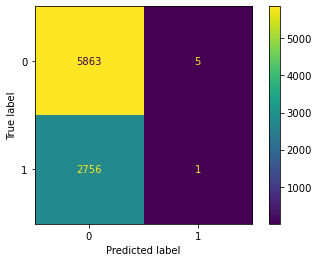

Accuracy SVC rbf: 0.6798840579710145
Recall SVC rbf: 0.0003627130939426913
Precision SVC rbf: 0.16666666666666666
F1 score SVC rbf: 0.0007238508867173361


In [ ]:
plot_learning_curve(clf, clf.classes_, x_train, y_train)
plot_confusion_matrix(clf, y_test, y_pred)
print_metrics(y_test, y_pred, "SVC rbf")


In [ ]:
y_train = np.ravel(y_train)
clf = SVC(kernel='poly')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


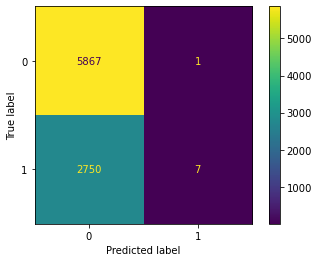

Accuracy SVC poly: 0.6810434782608695
Recall SVC poly: 0.0025389916575988395
Precision SVC poly: 0.875
F1 score SVC poly: 0.005063291139240506


In [ ]:
plot_learning_curve(clf, clf.classes_, x_train, y_train)
plot_confusion_matrix(clf, y_test, y_pred)
print_metrics(y_test, y_pred, "SVC poly")

In [ ]:
y_train = np.ravel(y_train)
clf = SVC(kernel='sigmoid')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

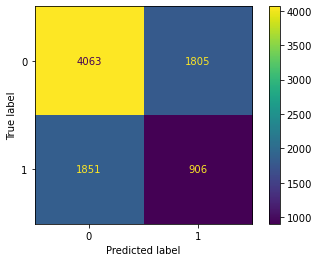

Accuracy sigmoid: 0.5761159420289855
Recall sigmoid: 0.32861806311207836
Precision sigmoid: 0.3341940243452601
F1 score sigmoid: 0.3313825896122897


In [ ]:
plot_learning_curve(clf, clf.classes_, x_train, y_train)
plot_confusion_matrix(clf, y_test, y_pred)
print_metrics(y_test, y_pred, "sigmoid")

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=x_train.shape[1], activation='relu',kernel_initializer='lecun_uniform'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu', kernel_initializer='lecun_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

# Use cross_val_score to evaluate the model using 10-fold cross-validation
scores = cross_val_score(model, x_train, y_train, cv=10)

# Print the mean and standard deviation of the scores
print("Mean accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

# Train the model, keeping track of the training and validation accuracy for each epoch
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

# Extract the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation recall
plt.plot(range(1, len(train_acc) + 1), train_acc, 'b', label='Training accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# make confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
predictions = model.predict(x_test)
 # print the predictions
print(predictions)

/var/folders/37/z4jydb4976915t7k69vbvb4c0000gn/T/ipykernel_45343/1435014441.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)


KeyboardInterrupt: 

In [ ]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print(confusion_mat)

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

# print the precision
print("Precision:",metrics.precision_score(y_test, predictions))

# print the recall
print("Recall:",metrics.recall_score(y_test, predictions))

# print the f1 score
print("F1 Score:",metrics.f1_score(y_test, predictions))

[[5306  562]
 [2177  580]]
Accuracy: 0.6824347826086956
Precision: 0.5078809106830122
Recall: 0.21037359448676096
F1 Score: 0.2975121826109259
